In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
#train.head()
import seaborn as sns
#sns.heatmap(train.isnull())

In [3]:
#sns.set_style('white')
#sns.countplot(x='Survived',data=train,palette='RdBu_r')

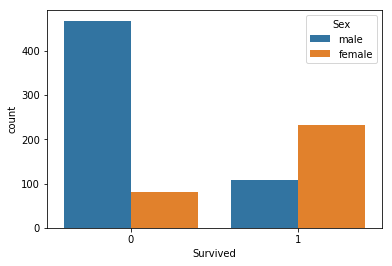

In [4]:
sns.countplot(x='Survived',hue='Sex',data=train)

In [5]:
def convert_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [6]:
train['Age'] = train[['Age','Pclass']].apply(convert_age,axis=1)
train.drop('Cabin',axis=1,inplace=True)
test['Age'] = test[['Age','Pclass']].apply(convert_age,axis=1)
test.drop('Cabin',axis=1,inplace=True)

In [7]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test=pd.concat([test,sex,embark],axis=1)
test.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [8]:
#sns.heatmap(train.isnull())

In [9]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train=pd.concat([train,sex,embark],axis=1)
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [10]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_test.fillna(X_train.mean(), inplace=True)
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [11]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.4, random_state=101)
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#logm = LogisticRegression()
logm = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
logm.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
#predictions = logm.predict(X_test)
y_train_pred = logm.predict(X_train)
y_test_pred = logm.predict(X_test)

In [13]:
acc_log = round(logm.score(X_train, Y_train) * 100, 2)
acc_log

86.42

In [14]:
#coeff_df = pd.DataFrame(train.columns.delete(0))
#coeff_df.columns = ['Feature']
#coeff_df["Correlation"] = pd.Series(logm.coef_[0])

#coeff_df.sort_values(by='Correlation', ascending=False)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_train_pred)
#test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
#print('The test accuracy is', test_accuracy)



The training accuracy is 0.8641975308641975


In [15]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_test_pred
    })

In [16]:
submission.to_csv("submission.csv", index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
